# Bellabeat Case Study
## **Scenario**
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

### **Bellabeat products**
* ***Bellabeat app:*** The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
* ***Leaf:*** Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connectsto the Bellabeat app to track activity, sleep, and stress.
* ***Time:*** This wellness watch combines the timeless look of a classic timepiece with smart technology to track useractivity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
* ***Spring:*** This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
* ***Bellabeat membership:*** Bellabeat also offers a subscription-based membership program for users.
Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

## Begin
First we could ask us what kind of insights are we looking for. Selected the ***Teaf*** or ***Time***, this means, stres, activity, sleep, after that we can start to manipulate data.
### **Datasets**
I used the next datasets for analysis.
* dailyActivity_merged.csv
* sleepDay_merged.csv
* heartrate_seconds_merged.csv
* hourlySteps_merged.csv
* hourlyCalories_merged.csv

  After, I use tidyverse library for analysis 

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Once it charge, I read the respective datasets from the *fitbit* 

In [30]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heart_rate <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
data_calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_step <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

### Cleaning data for analysis
After taking a look to the datasets we can see NULL values or repeted values, each measure has to be only one in a certain time for instance, so I don't need this repeated values, I clean this data droping this values.

In this part there are data that can be inconsistent, for example, **TotalSteps** values are 0, this is incorrect because it can't be posible, so I have to clean this rows too

In [25]:
daily_activity <- distinct(daily_activity) %>%
    drop_na() 

daily_activity <- daily_activity[!(daily_activity$TotalSteps == 0),]  # this delete rows where TotalSteps are 0

sleep_day <- distinct(sleep_day) %>%
    drop_na()

heart_rate <- distinct(heart_rate) %>%
    drop_na()

data_calories <- distinct(data_calories) %>%
    drop_na()

hourly_step <- distinct(hourly_step) %>%
    drop_na()
head(hourly_step)

,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


For a properly analysis, there are some steps to do before that, like changing the data type for dates colums, join tables and grouping items to get a summarise table, this steps are only for some tables.

In [4]:
daily_activity <- mutate(daily_activity,activity_date=mdy(ActivityDate))

sleep_day <- mutate(sleep_day,sleep_date=as_date(mdy_hms(SleepDay)))

heart_rate <- mutate(heart_rate,rate=as_datetime(mdy_hms(Time)), "rate/min" = floor_date(rate,unit = "minute"))
heart_rate_min <- group_by(heart_rate,Id,"rate/min") %>% 
  summarize(average_rate = mean(Value), .groups = "drop")

sleep_day <- mutate(sleep_day,sleep_date=as_date(mdy_hms(SleepDay)))

For **heart_rate** I can create the column formating to date and another column with rounded the time because I need time values in a certain hour, so I use *floor_date* to give the date values to te hour nearly value, and because I don't do anything more with this table I can grouping and summarize the new columns in **heart_rate_min**, the other tables I have to join for summarize them

In [5]:
# Join tables
dailyActivity <- left_join(daily_activity,sleep_day,by = c('Id','activity_date'='sleep_date'))

# summarizing
stepsday <- group_by(dailyActivity,Id) %>%
  summarize(averageStep=round(mean(TotalSteps,na.rm=T)),
            averageSleep = mean(TotalMinutesAsleep,na.rm=T)/60,
            averageDistance = mean(TotalDistance,na.rm=T)) %>% 
  mutate(active = case_when(
    averageStep <3000 ~ "sedentary",
    averageStep >= 3000 & averageStep <=6000 ~ "Normal",
    averageStep > 6000 & averageStep <=10000 ~ "Active",
    averageStep > 10000 ~ "Very Active"),
    )

# Add hear_rate_min column
daily_working_out <- left_join(stepsday,heart_rate_min %>% select(Id,average_rate),by = c("Id"))



Id,averageStep,averageSleep,averageDistance,active,average_rate
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1503960366,12521,6.004667,8.070000,Very Active,NA
1624580081,5744,NaN,3.914839,Normal,NA
1644430081,7283,4.900000,5.295333,Active,NA
1844505072,3809,10.866667,2.518571,Normal,NA
1927972279,1671,6.950000,1.157059,sedentary,NA
2022484408,11371,NaN,8.084193,Very Active,80.23686


With this I get the next table with information about customers.
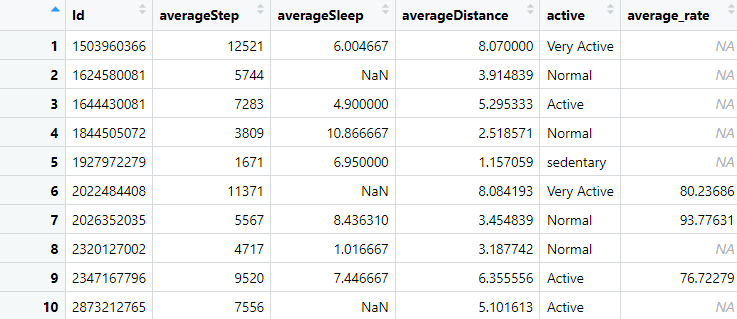

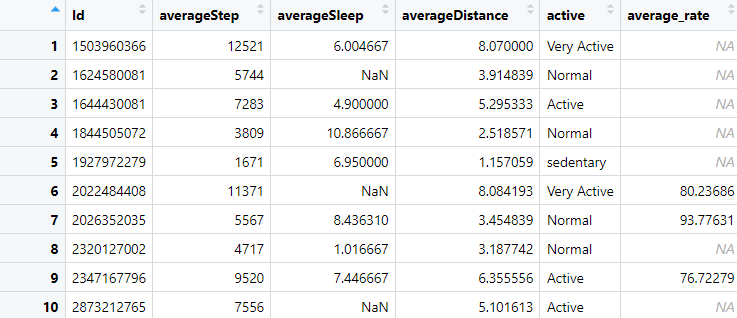

There are information about users that can be useful for company.

## Share and present with others
Now, I have to reate and present this and other analysis to the stakeholders, using visual in R create some to present.


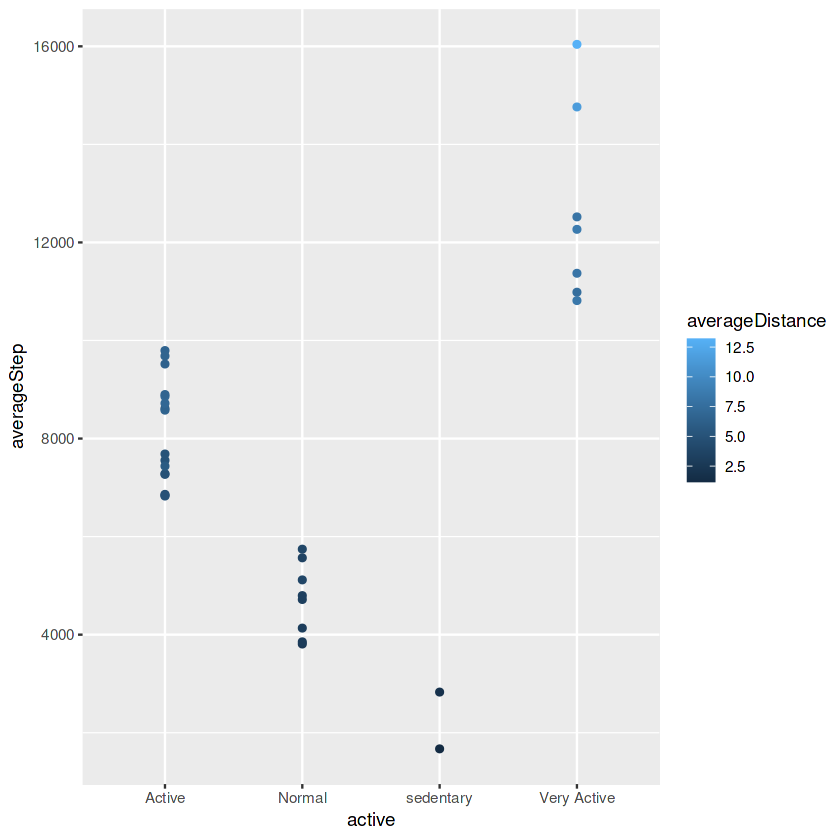

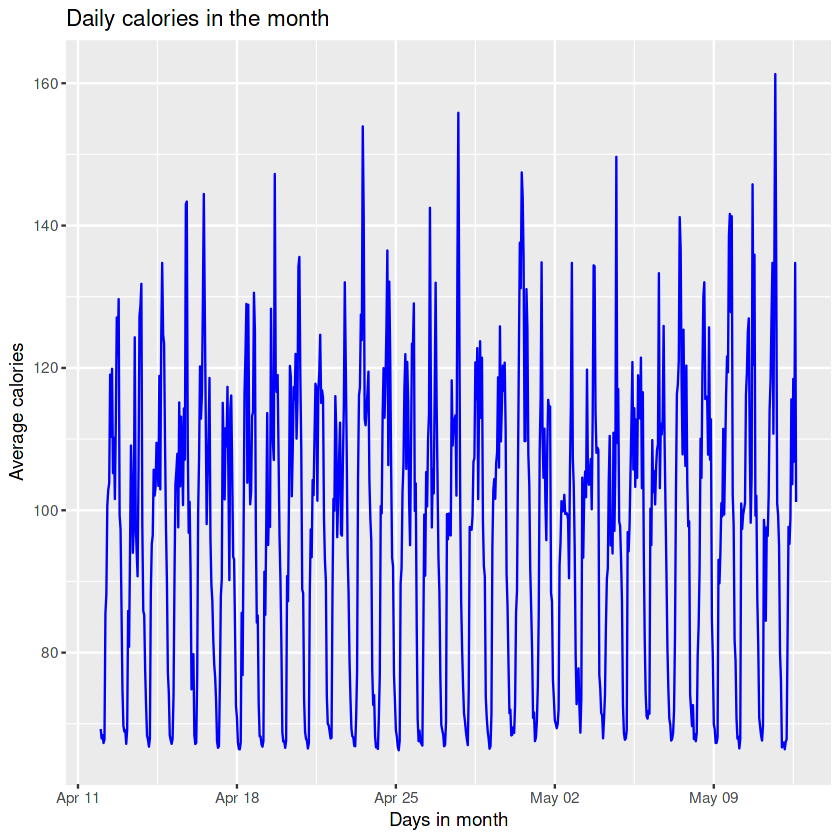

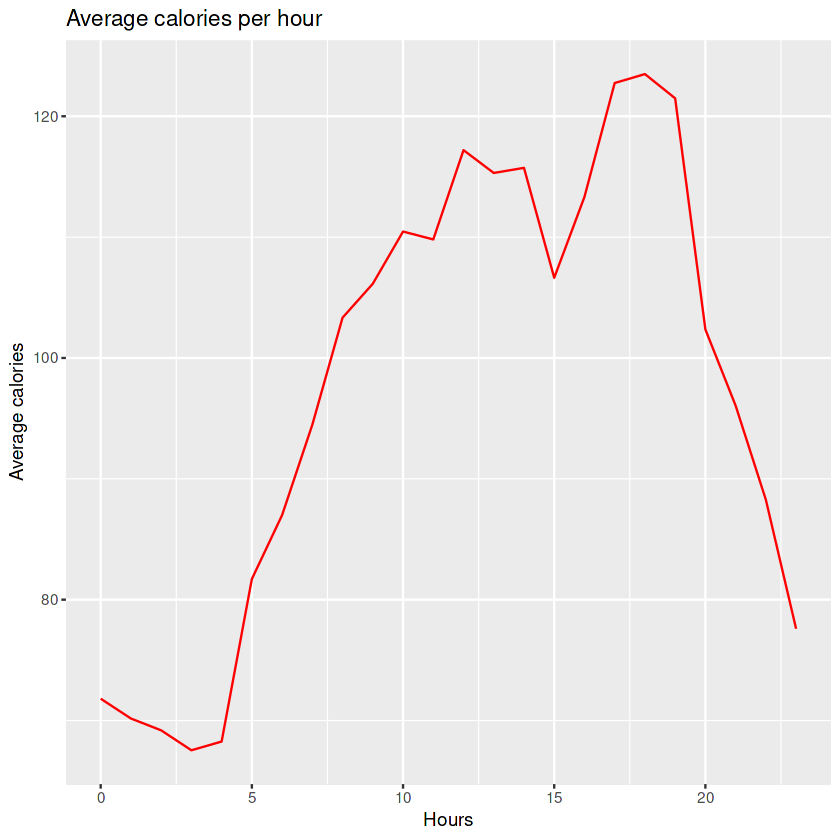

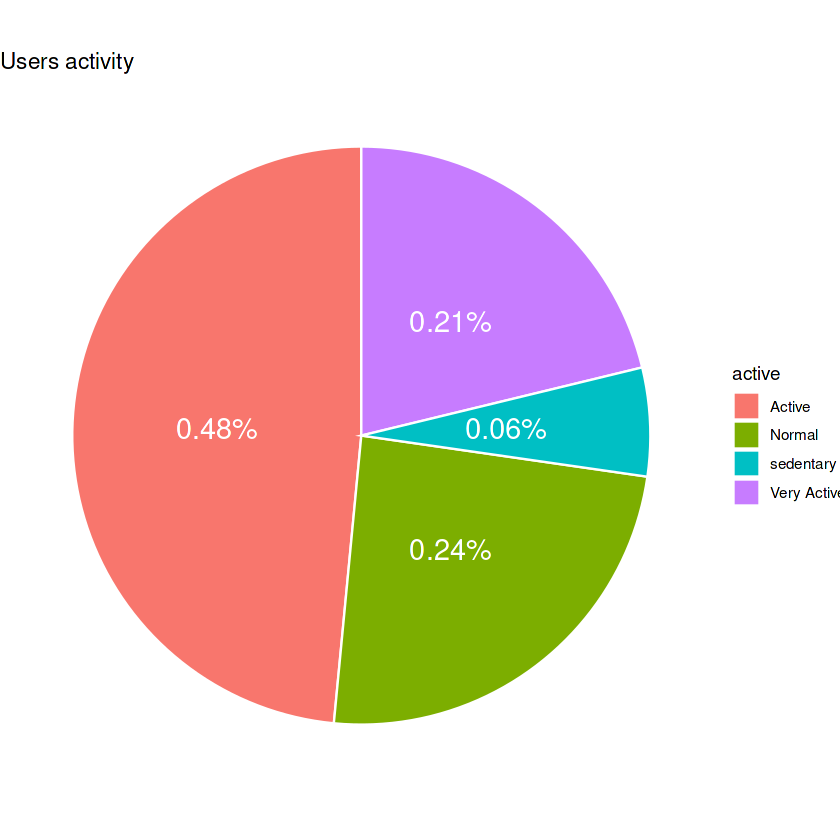

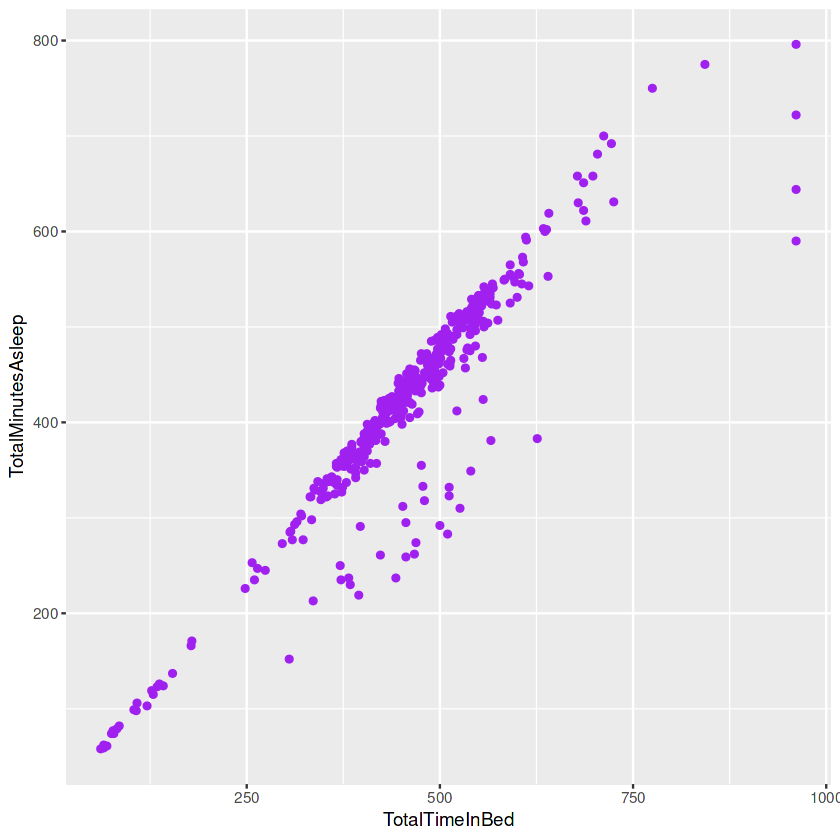

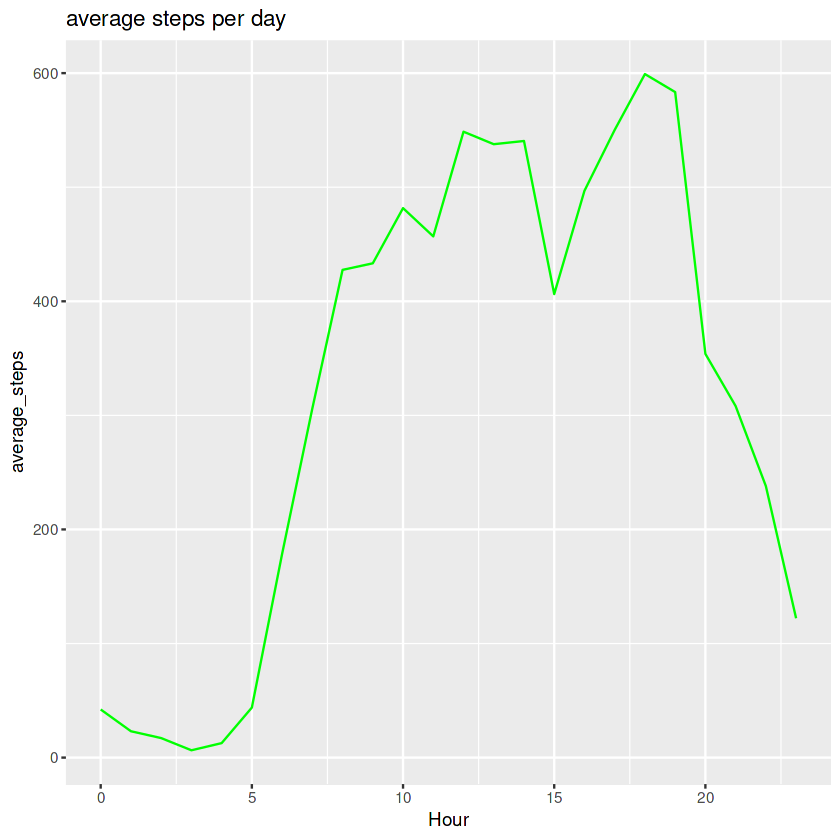

In [32]:
# General activity
ggplot(daily_working_out) + geom_point(mapping = aes(x = active, y = averageStep, color = averageDistance))

#Calories 
month_calories <- mutate(data_calories,time = (mdy_hms(ActivityHour))) %>% 
  group_by(time) %>% 
  summarize(average_calories = mean(Calories), .groups="drop")#data frame calories in months
 
# Calories in the month and average in a day
day_calories <- mutate(data_calories, time_hour= hour(mdy_hms(ActivityHour))) %>% 
  group_by(time_hour) %>% 
  summarize(average_calories = mean(Calories, .groups="drop"))  #data frame average calories per day

ggplot(month_calories, aes(x = time,y = average_calories)) + geom_line(color = "blue")+ # calories in the month
  labs(title="Daily calories in the month",
       x="Days in month",
       y="Average calories")
ggplot(day_calories,aes(x = time_hour, y = average_calories)) + geom_line(color="red") + #calories per day
  labs(title="Average calories per hour",
      x="Hours",
      y="Average calories")

# Users activity
Activity <- daily_working_out %>% 
  select(Id,active) %>% 
  count(active) %>% 
  mutate(percentage = (n*100)/sum(n)) %>% 
  as.data.frame()  
  ggplot(data=Activity,aes(x="",y=percentage,fill = active))+geom_bar(stat = "identity",color="white") + 
    labs(title = "Users activity")+
    geom_text(aes(label=paste0((round(percentage/100,2)),"%")),
    position=position_stack(vjust=0.5),color="white",size=6)+
    coord_polar(theta = "y")+
    theme_void()

# Sleep healt
# sleep_day charged before
  ggplot(sleep_day,aes(x=TotalTimeInBed,y = TotalMinutesAsleep)) + geom_point(color = "purple")

# average steps
hourly_steps <- mutate(hourly_step, Hour = hour(mdy_hms(ActivityHour))) %>% 
  group_by(Hour) %>% 
  summarize(average_steps = mean(StepTotal), .groups = "drop") 
ggplot(hourly_steps, aes(x=Hour,y = average_steps)) + geom_line(color = "green")+
  labs(title = "average steps per day")

### **General activity**
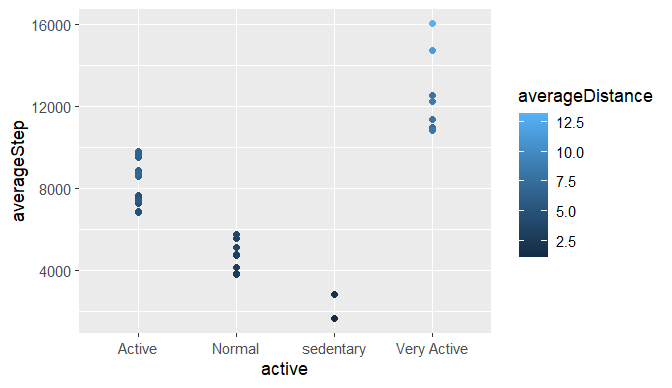

### **Calories in month**
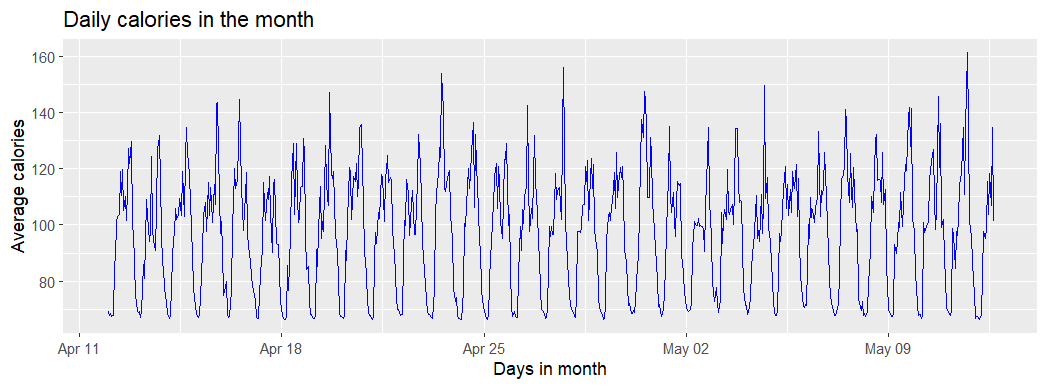

### **Average Calories in a day**
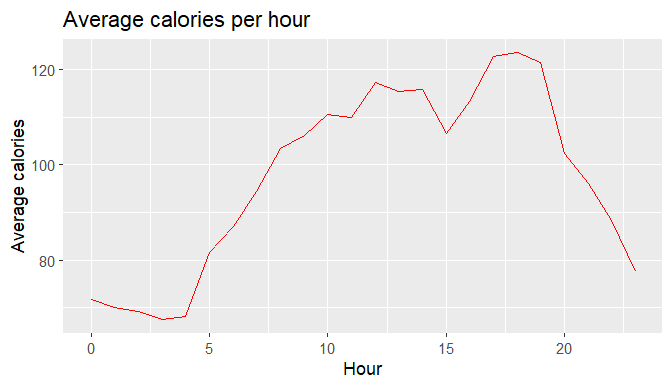

### **Average steps in a day**
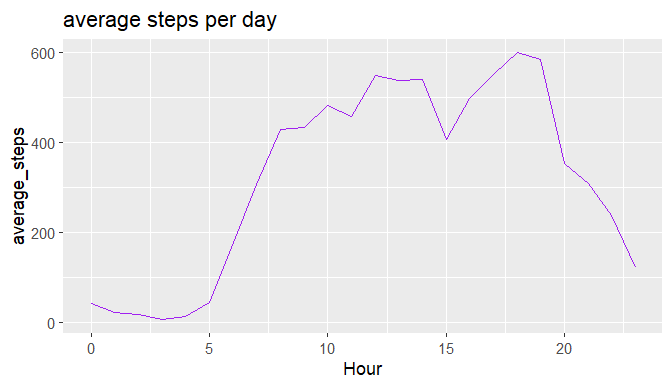
This graph is very similar to the average age, it make sense because if you walk for more time, you will reach more distance
### **User activities**
Percentage of active users
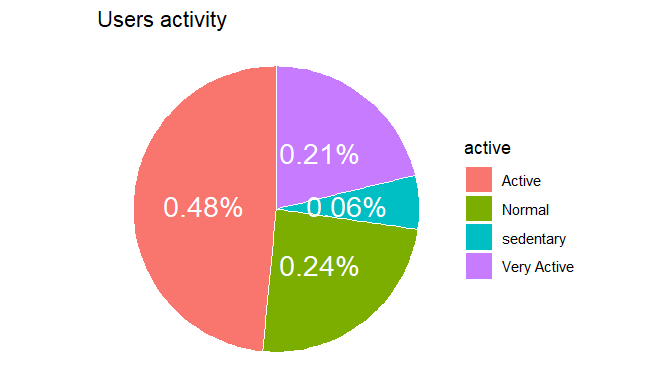

### **Sleep healt**
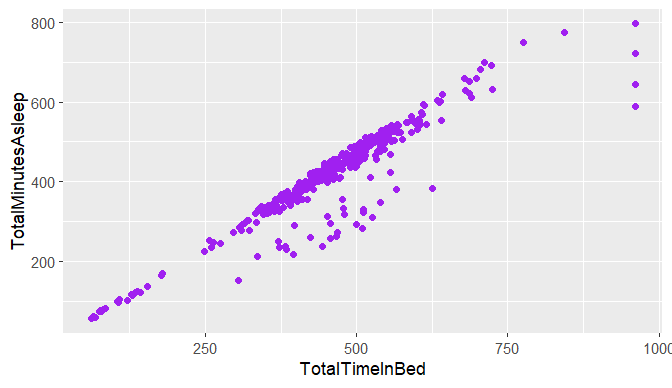


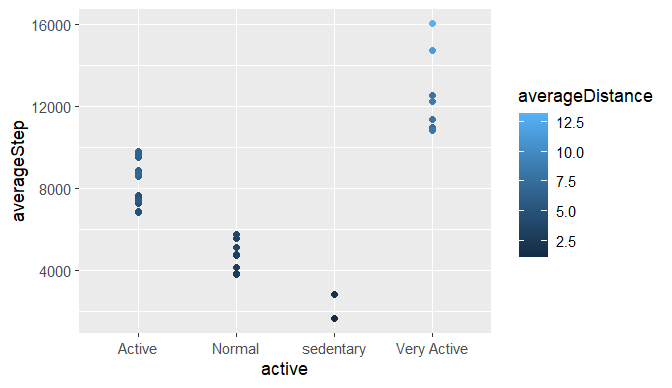
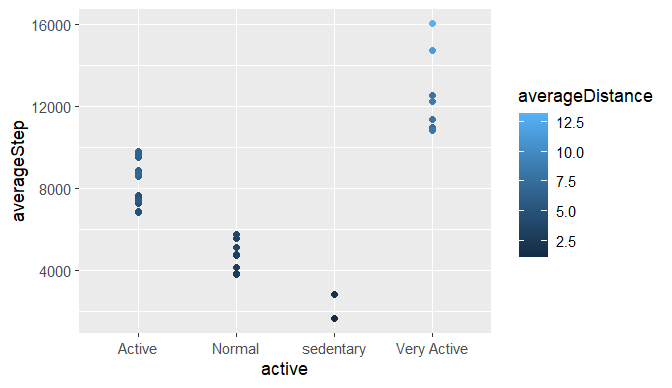

## **Recomendations with the analysis**
First, Bellabeat company would like know general information about his users/customers, the **Lief** or **Time** product are useful to give this acurate information, because it is on body users in the most part of the day so in the Bellabeat App, you can bring (but first offer) a king of routine or a recomendation for his health, the first chart or table presented as a analysis present this information or data that can be tranform for this recomedatios, for example, if you have not done enough exercise app give a notification to do that, in the other way, you can give a summary of activity to users and with that the users can be more confortable with their results.

The sleep health is important for presenting to users, because part of them have bad habits when are in bed, they only stay laying down, but they don't sleep or rest, the visual present that most users have good sleep habits, this agree with the users active, I mean, most of them are active and very active users, this is useful for users health.

Finally, this is only for data, numbers or information that you can present in a way to users, in the other hand, plots are useful to the Bellabeat team. Things like **General activity**, **Average steps and calories** give information that can be useful to improve some process in general enviroment of Bellabeat company involving the app functionality, general activity show what kind of people are the costumers use this products or whether are related to the company, if they do enough exercise and stay alert to this. **Average** give patterns of users activity, for example, at 3 o'clock (15 hours) are the time that most users stay quiet, you can conclude the reazon is because this time is luch time for most people, so they reduce activity, and in the middle of afternoon stay more active. It might be dificult to relate to something, but if the app conect to the Wifi, this could produce a bad working of the app and the costumer and Bellabeat team can't understand what is the reason, this is because in this time are more traffic data users.

